# <center> **Kaggle’s Spaceship Titanic Competition**
# <center> **Imputing Missing Values**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

from sklearn.preprocessing import LabelEncoder

import warnings


importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Data Overview and Preprocessing**

In [2]:
data = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\data.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

### **Missing Values**

In [3]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,288,2.22
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28
Transported,4277,32.98


## **Home Planet**

### **Impute Home Planet from Group**

In [4]:
unique_homeplanets_per_group = data.groupby('Group')['HomePlanet'].nunique()
groups_with_multiple_planets = unique_homeplanets_per_group[unique_homeplanets_per_group > 1]

print(groups_with_multiple_planets)

Series([], Name: HomePlanet, dtype: int64)


In [5]:
# Step 1: Group by 'Group' and find the most common (or only) HomePlanet
group_homeplanet_map = data.groupby('Group')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the group's identified HomePlanet
def fill_missing_homeplanet(row):
    if pd.isna(row['HomePlanet']):
        return group_homeplanet_map.get(row['Group'], row['HomePlanet'])
    else:
        return row['HomePlanet']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['HomePlanet'] = data.apply(fill_missing_homeplanet, axis=1)

In [6]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,157,1.21
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28
Transported,4277,32.98


### **Impute Home Planet from Last Name**

In [7]:
# Step 1: Group by 'LastName' and find the most common (or only) HomePlanet for each LastName
lastname_homeplanet_map = data.groupby('LastName')['HomePlanet'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the LastName's identified HomePlanet
def fill_missing_homeplanet_by_lastname(row):
    if pd.isna(row['HomePlanet']):
        return lastname_homeplanet_map.get(row['LastName'], row['HomePlanet'])
    else:
        return row['HomePlanet']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['HomePlanet'] = data.apply(fill_missing_homeplanet_by_lastname, axis=1)

In [8]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
HomePlanet,7,0.05
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28
Transported,4277,32.98


### **Impute Home Planet from Mode**

In [9]:
homeplanet_mode = data['HomePlanet'].mode()[0]
print(homeplanet_mode)

Earth


In [10]:
mode_value = data['HomePlanet'].mode()

if not mode_value.empty:
    data['HomePlanet'] = data['HomePlanet'].fillna(mode_value[0])

In [11]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,274,2.11
VIP,296,2.28
Transported,4277,32.98


## **Destination**

### **Impute Destination from Group**

In [12]:
unique_destinationplanets_per_group = data.groupby('Group')['Destination'].nunique()
groups_with_multiple_destinations = unique_destinationplanets_per_group[unique_destinationplanets_per_group > 1]

groups_with_multiple_destinations.head()

Group
8     2
17    2
20    3
32    2
44    3
Name: Destination, dtype: int64

In [13]:
# Step 1: Group by 'Group' and find the most common (or only) HomePlanet
group_destinationplanet_map = data.groupby('Group')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing HomePlanet based on the group's identified HomePlanet
def fill_missing_destinationplanet(row):
    if pd.isna(row['Destination']):
        return group_destinationplanet_map.get(row['Group'], row['Destination'])
    else:
        return row['Destination']

# Step 3: Apply the function to fill missing values in the HomePlanet column
data['Destination'] = data.apply(fill_missing_destinationplanet, axis=1)

In [14]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,154,1.19
VIP,296,2.28
Transported,4277,32.98


### **Impute Destination from Last Name**

In [15]:
lastname_destinationplanet_map = data.groupby('LastName')['Destination'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_destinationplanet_by_lastname(row):
    if pd.isna(row['Destination']):
        return lastname_destinationplanet_map.get(row['LastName'], row['Destination'])
    else:
        return row['Destination']

data['Destination'] = data.apply(fill_missing_destinationplanet_by_lastname, axis=1)

In [16]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
Destination,4,0.03
VIP,296,2.28
Transported,4277,32.98


### **Impute Destination from Mode**

In [17]:
desinationplanet_mode = data['Destination'].mode()[0]
print(desinationplanet_mode)

TRAPPIST-1e


In [18]:
data['Destination'] = data['Destination'].fillna(data['Destination'].mode()[0])

In [19]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinDeck,299,2.31
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


## **Cabin Deck**

### **Cabin Deck and Home Planet**

In [20]:
data.pivot_table(index='CabinDeck', columns='HomePlanet', aggfunc='size', fill_value=0)

HomePlanet,Earth,Europa,Mars
CabinDeck,,,
A,1,353,0
B,0,1141,0
C,1,1101,0
D,3,306,411
E,597,203,523
F,2480,0,1759
G,3781,0,0
T,0,11,0


Passengers on decks A (Except 1 passenger), B, C (Except 1 passenger), T came from Europa </BR>
Passengers on deck G came from Earth.</BR>
Passengers on decks D, E or F came from multiple planets.</BR>

### **Impute CabinDeck G from Earth**

For train set, we went down from 199 to 100. For test set, we went from 100 to 38.

In [21]:
# Fill missing CabinDeck values with 'G' where HomePlanet is 'Earth'
data.loc[(data['HomePlanet'] == 'Earth') & (data['CabinDeck'].isnull()), 'CabinDeck'] = 'G'

In [22]:
functions.MissingValues(data)

,NumberMissing,PercentageMissing
CabinDeck,138,1.06
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


### **Impute CabinDeck from Last Name**

In [23]:
lastname_cabindeck_map = data.groupby('LastName')['CabinDeck'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

def fill_missing_cabindeck_by_lastname(row):
    if pd.isna(row['CabinDeck']):
        return lastname_homeplanet_map.get(row['LastName'], row['CabinDeck'])
    else:
        return row['CabinDeck']

data['CabinDeck'] = data.apply(fill_missing_cabindeck_by_lastname, axis=1)

In [24]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,299,2.31
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


## **Cabin Side**

Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group

In [25]:
unique_cabinside_per_group = data[data['GroupSize']>1].groupby('Group')['CabinSide'].nunique()
grouped_by_unique_count = unique_cabinside_per_group.value_counts().sort_index()

grouped_by_unique_count = grouped_by_unique_count.to_frame().reset_index()

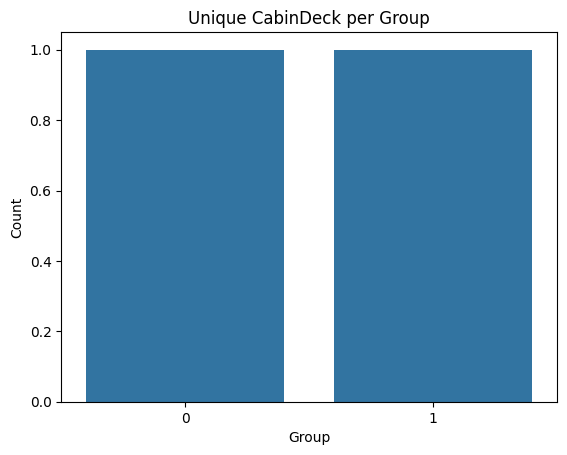

In [26]:
sns.countplot(data=grouped_by_unique_count, x='CabinSide')
plt.title('Unique CabinDeck per Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

### **Cabin Side from Group**

In [27]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['Group', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['Group'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'Group'].map(group_cabinside.idxmax(axis=1))

In [28]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,162,1.25
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


### **Cabin Side from Last Name**

In [29]:
# Step 1: Group by 'Group' and 'CabinSide' for groups with more than 1 member, and count occurrences
group_cabinside = data[data['GroupSize'] > 1].groupby(['LastName', 'CabinSide']).size().unstack(fill_value=0)

# Step 2: Identify rows where 'CabinSide' is missing and 'Group' is in the group_cabinside index.
missing_cabinside_mask = data['CabinSide'].isna() & data['LastName'].isin(group_cabinside.index)

# Step 3: Fill missing 'LastName' based on the most common 'LastName' in each 'Group'
data.loc[missing_cabinside_mask, 'CabinSide'] = data.loc[missing_cabinside_mask, 'LastName'].map(group_cabinside.idxmax(axis=1))

In [30]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CabinSide,65,0.50
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


### **Replace Cabin Side Missing Values by Letter U**

The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [31]:
# Missing values before
CS_bef=data['CabinSide'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['CabinSide'].isna(),'CabinSide']='U'

### **Train Set Missing Values**

In [32]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


## **Cabin Number**

There is an interesting pattern here. The cabin_number and group_number share a linear relationship on a deck by deck basis. We can therefore extrapolate the missing cabin numbers using linear regression on a deck by deck basis to get an approximate cabin number.

### **Cabin Number from Group and Deck**

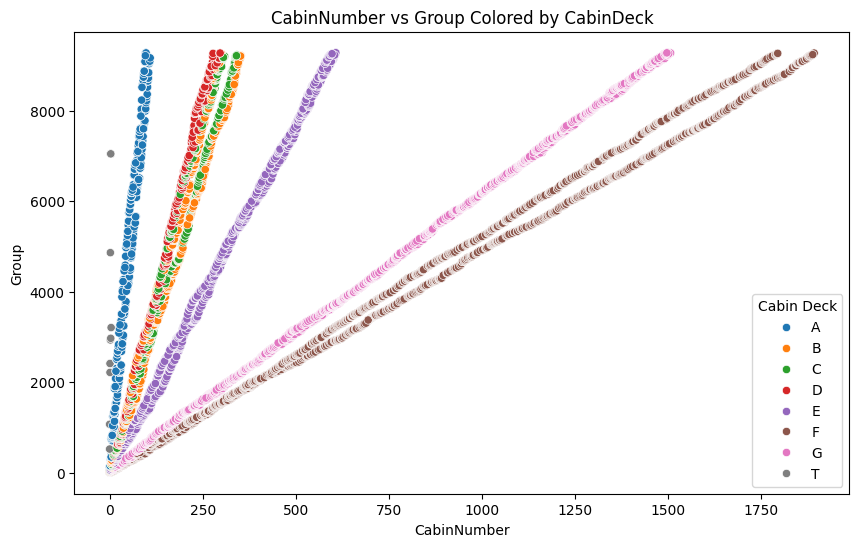

In [33]:
# Step 1: Filter the DataFrame to exclude rows where CabinNumber is NaN
filtered_train = data[~data['CabinNumber'].isna()]

# Step 2: Encode the CabinDeck column
encoder = LabelEncoder()
encoded_cabin_deck = encoder.fit_transform(filtered_train['CabinDeck'])

# Create a mapping from encoded values to actual labels
label_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

# Step 3: Create the scatter plot with `hue`
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=filtered_train['CabinNumber'], y=filtered_train['Group'], hue=encoded_cabin_deck, palette='tab10')

# Update the legend to show actual CabinDeck labels
handles, labels = scatter.get_legend_handles_labels()
# Convert labels from encoded values to actual labels
new_labels = [label_mapping[int(label)] for label in labels]
scatter.legend(handles, new_labels, title='Cabin Deck')

plt.title('CabinNumber vs Group Colored by CabinDeck')
plt.show()


In [34]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CabinNumber,299,2.31
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


In [35]:
# Impute missing Cabin Numbers based on mode within groups
data['CabinNumber'] = data.groupby(['Group'])['CabinNumber'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [36]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
CryoSleep,310,2.39
VIP,296,2.28
Transported,4277,32.98


## **CryoSleep**

In [37]:
pd.set_option('future.no_silent_downcasting', True)

Imputed Missing values with False since most passengers were False. 

In [38]:
data['CryoSleep'] = data['CryoSleep'].fillna(False).astype(bool)


In [39]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
VIP,296,2.28
Transported,4277,32.98


## **VIP**

Imputed Missing values with False since most passengers were False. 

In [40]:
data['VIP'] = data['VIP'].fillna(False).astype(bool)


In [41]:
missing_values = functions.MissingValues(data)
missing_values

,NumberMissing,PercentageMissing
Transported,4277,32.98


## **Save Dataset**

In [43]:
data.to_csv(r"C:\Users\Dell\Documents\AI\Titanic\Data\data.csv", index=False)